In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from tensorflow.keras.callbacks import *

In [3]:
CLASS_NAMES= ['healthy', 'mild', 'moderate', 'severe']
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3
NUM_CLASSES = len(CLASS_NAMES)

# **ResNET**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#load data
data_x = np.load('data_x_original_augmented.npy')/255 #images
data_y = np.load('data_y_original_augmented.npy') #labels
TOTAL_IMAGES = len(data_y)
print("TOTAL_IMAGES = ", TOTAL_IMAGES)

TOTAL_IMAGES =  6512


In [6]:
data_x[0]

array([[[0.5035917 , 0.48278838, 0.61827826],
        [0.43694696, 0.39316258, 0.62287456],
        [0.42350966, 0.3705389 , 0.58214575],
        ...,
        [0.29332578, 0.2721597 , 0.55356514],
        [0.2456723 , 0.2289277 , 0.49879068],
        [0.2016916 , 0.19337596, 0.4315446 ]],

       [[0.16767335, 0.16631964, 0.401642  ],
        [0.17786422, 0.16733506, 0.41572544],
        [0.26617154, 0.2451947 , 0.47989777],
        ...,
        [0.36357257, 0.29766145, 0.52300173],
        [0.34233516, 0.29598942, 0.52780753],
        [0.34951913, 0.30980393, 0.5377544 ]],

       [[0.55569386, 0.53333336, 0.6432693 ],
        [0.516632  , 0.50032526, 0.617379  ],
        [0.4499872 , 0.4106995 , 0.6219752 ],
        ...,
        [0.30757502, 0.28107563, 0.5627995 ],
        [0.2629395 , 0.24526027, 0.49440747],
        [0.22718133, 0.19843099, 0.46325564]],

       ...,

       [[0.31942454, 0.2892177 , 0.5233513 ],
        [0.3125396 , 0.293018  , 0.5321479 ],
        [0.33296153, 0

# **Splitting data in train - validation - test**

In [7]:
#percentage of the dataset which will be on TRAIN - TEST - VALIDATION
TRAIN_PERCENTAGE = 0.8
TEST_PERCENTAGE = 0.1
VALIDATION_PERCENTAGE = 0.1

In [8]:
train_size = int(TRAIN_PERCENTAGE * TOTAL_IMAGES)
test_size = int(TEST_PERCENTAGE * TOTAL_IMAGES)
validation_size = int(VALIDATION_PERCENTAGE * TOTAL_IMAGES)

In [9]:
train_x = data_x[:train_size] #taking train images from original data
train_y = data_y[:train_size]
data_x = data_x[train_size:] #removing train images from original data
data_y = data_y[train_size:]

test_x = data_x[:test_size] #taking test images from original data
test_y = data_y[:test_size]
data_x = data_x[test_size:] #removing test images from original data
data_y = data_y[test_size:]

validation_x = data_x #all the remainder images we can put on validation
validation_y = data_y

del data_x #free some unused memory
del data_y

In [10]:
print("train_size = ", len(train_y))
print("test_size = ", len(test_y))
print("validation_size = ", len(validation_y))

train_size =  5209
test_size =  651
validation_size =  652


In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [13]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB1
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.applications import EfficientNetB4
# from tensorflow.keras.applications import EfficientNetB5
# from tensorflow.keras.applications import EfficientNetB6
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import *

In [14]:
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [15]:
model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT,IMG_WIDTH, CHANNELS),
    pooling=None,
    classes=NUM_CLASSES,
   # classifier_activation="softmax",
#    **kwargs
)

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

new_model = models.Sequential()
new_model.add(model)
#3rd conv layer
new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#4th conv layer
new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#Flatten Layer
new_model.add(tf.keras.layers.Flatten())

new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.Dropout(0.2))

#output Dense Layer
new_model.add(tf.keras.layers.Dense(NUM_CLASSES))
new_model.add(tf.keras.layers.Activation('softmax'))
adam = tf.keras.optimizers.Adam(lr=0.001)


C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 32)          589856    
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 32)         128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 4, 4, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          1

In [18]:
epochs = 300

#compila e treina o modelo com os dados carregados
new_model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer=adam)
model_trained = new_model.fit(train_x, train_y,epochs=epochs,verbose=2,validation_data=(validation_x, validation_y),shuffle=False)

Epoch 1/300
163/163 - 58s - loss: 1.8144 - acc: 0.5026 - val_loss: 2.0196 - val_acc: 0.2653 - 58s/epoch - 358ms/step
Epoch 2/300
163/163 - 48s - loss: 1.2502 - acc: 0.6470 - val_loss: 1.8532 - val_acc: 0.2439 - 48s/epoch - 292ms/step
Epoch 3/300
163/163 - 48s - loss: 0.9336 - acc: 0.7213 - val_loss: 1.9566 - val_acc: 0.2439 - 48s/epoch - 292ms/step
Epoch 4/300
163/163 - 47s - loss: 0.7636 - acc: 0.7514 - val_loss: 2.2986 - val_acc: 0.2653 - 47s/epoch - 288ms/step
Epoch 5/300
163/163 - 47s - loss: 0.6406 - acc: 0.7848 - val_loss: 2.1963 - val_acc: 0.2653 - 47s/epoch - 289ms/step
Epoch 6/300
163/163 - 47s - loss: 0.5503 - acc: 0.8117 - val_loss: 3.0952 - val_acc: 0.2822 - 47s/epoch - 290ms/step
Epoch 7/300
163/163 - 47s - loss: 0.4513 - acc: 0.8460 - val_loss: 3.0925 - val_acc: 0.3160 - 47s/epoch - 291ms/step
Epoch 8/300
163/163 - 47s - loss: 0.4072 - acc: 0.8595 - val_loss: 3.2534 - val_acc: 0.3374 - 47s/epoch - 291ms/step
Epoch 9/300
163/163 - 47s - loss: 0.3385 - acc: 0.8860 - val_los

Epoch 71/300
163/163 - 48s - loss: 0.0581 - acc: 0.9848 - val_loss: 2.2813 - val_acc: 0.5813 - 48s/epoch - 293ms/step
Epoch 72/300
163/163 - 48s - loss: 0.0331 - acc: 0.9917 - val_loss: 3.8755 - val_acc: 0.5000 - 48s/epoch - 292ms/step
Epoch 73/300
163/163 - 48s - loss: 0.0381 - acc: 0.9900 - val_loss: 5.3822 - val_acc: 0.4126 - 48s/epoch - 292ms/step
Epoch 74/300
163/163 - 48s - loss: 0.0215 - acc: 0.9946 - val_loss: 3.8206 - val_acc: 0.5291 - 48s/epoch - 292ms/step
Epoch 75/300
163/163 - 48s - loss: 0.0208 - acc: 0.9960 - val_loss: 2.1546 - val_acc: 0.6564 - 48s/epoch - 292ms/step
Epoch 76/300
163/163 - 48s - loss: 0.0186 - acc: 0.9960 - val_loss: 2.7696 - val_acc: 0.5997 - 48s/epoch - 292ms/step
Epoch 77/300
163/163 - 48s - loss: 0.0139 - acc: 0.9965 - val_loss: 1.5895 - val_acc: 0.7469 - 48s/epoch - 293ms/step
Epoch 78/300
163/163 - 48s - loss: 0.0090 - acc: 0.9981 - val_loss: 1.4130 - val_acc: 0.7255 - 48s/epoch - 293ms/step
Epoch 79/300
163/163 - 48s - loss: 0.0324 - acc: 0.9916 

Epoch 139/300
163/163 - 48s - loss: 0.0339 - acc: 0.9919 - val_loss: 2.4020 - val_acc: 0.5920 - 48s/epoch - 293ms/step
Epoch 140/300
163/163 - 48s - loss: 0.0241 - acc: 0.9956 - val_loss: 5.1267 - val_acc: 0.5706 - 48s/epoch - 293ms/step
Epoch 141/300
163/163 - 48s - loss: 0.0167 - acc: 0.9969 - val_loss: 3.7969 - val_acc: 0.5031 - 48s/epoch - 293ms/step
Epoch 142/300
163/163 - 48s - loss: 0.0165 - acc: 0.9967 - val_loss: 6.5938 - val_acc: 0.4279 - 48s/epoch - 292ms/step
Epoch 143/300
163/163 - 48s - loss: 0.0134 - acc: 0.9977 - val_loss: 2.3437 - val_acc: 0.6733 - 48s/epoch - 292ms/step
Epoch 144/300
163/163 - 48s - loss: 0.0404 - acc: 0.9900 - val_loss: 3.7111 - val_acc: 0.6380 - 48s/epoch - 292ms/step
Epoch 145/300
163/163 - 48s - loss: 0.0415 - acc: 0.9892 - val_loss: 6.3469 - val_acc: 0.4310 - 48s/epoch - 293ms/step
Epoch 146/300
163/163 - 48s - loss: 0.0087 - acc: 0.9990 - val_loss: 1.2662 - val_acc: 0.7715 - 48s/epoch - 292ms/step
Epoch 147/300
163/163 - 48s - loss: 0.0033 - acc

Epoch 207/300
163/163 - 47s - loss: 1.2688e-04 - acc: 1.0000 - val_loss: 1.1620 - val_acc: 0.8006 - 47s/epoch - 291ms/step
Epoch 208/300
163/163 - 47s - loss: 1.3074e-04 - acc: 1.0000 - val_loss: 1.1715 - val_acc: 0.7960 - 47s/epoch - 291ms/step
Epoch 209/300
163/163 - 47s - loss: 1.1969e-04 - acc: 1.0000 - val_loss: 1.1753 - val_acc: 0.8037 - 47s/epoch - 291ms/step
Epoch 210/300
163/163 - 48s - loss: 1.4554e-04 - acc: 1.0000 - val_loss: 1.1295 - val_acc: 0.8037 - 48s/epoch - 291ms/step
Epoch 211/300
163/163 - 47s - loss: 1.1025e-04 - acc: 1.0000 - val_loss: 1.1665 - val_acc: 0.8021 - 47s/epoch - 291ms/step
Epoch 212/300
163/163 - 47s - loss: 1.0756e-04 - acc: 1.0000 - val_loss: 1.1629 - val_acc: 0.7991 - 47s/epoch - 291ms/step
Epoch 213/300
163/163 - 48s - loss: 1.1338e-04 - acc: 1.0000 - val_loss: 1.1808 - val_acc: 0.8052 - 48s/epoch - 291ms/step
Epoch 214/300
163/163 - 47s - loss: 9.3153e-05 - acc: 1.0000 - val_loss: 1.1515 - val_acc: 0.8052 - 47s/epoch - 291ms/step
Epoch 215/300
16

Epoch 274/300
163/163 - 47s - loss: 6.5340e-05 - acc: 1.0000 - val_loss: 1.1591 - val_acc: 0.8067 - 47s/epoch - 291ms/step
Epoch 275/300
163/163 - 47s - loss: 6.1100e-05 - acc: 1.0000 - val_loss: 1.2422 - val_acc: 0.7945 - 47s/epoch - 291ms/step
Epoch 276/300
163/163 - 47s - loss: 6.0204e-05 - acc: 1.0000 - val_loss: 1.2979 - val_acc: 0.8083 - 47s/epoch - 291ms/step
Epoch 277/300
163/163 - 47s - loss: 6.3087e-05 - acc: 1.0000 - val_loss: 1.1923 - val_acc: 0.7960 - 47s/epoch - 291ms/step
Epoch 278/300
163/163 - 47s - loss: 1.3969e-04 - acc: 1.0000 - val_loss: 4.2979 - val_acc: 0.7500 - 47s/epoch - 291ms/step
Epoch 279/300
163/163 - 47s - loss: 0.2293 - acc: 0.9376 - val_loss: 3.7938 - val_acc: 0.4969 - 47s/epoch - 291ms/step
Epoch 280/300
163/163 - 47s - loss: 0.0625 - acc: 0.9869 - val_loss: 5.8947 - val_acc: 0.5506 - 47s/epoch - 291ms/step
Epoch 281/300
163/163 - 47s - loss: 0.0291 - acc: 0.9944 - val_loss: 5.3178 - val_acc: 0.3635 - 47s/epoch - 291ms/step
Epoch 282/300
163/163 - 47s 

In [19]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 32, 32, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 32, 32, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 16, 16, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [20]:
def getLayerIndexByName(model, layername):
    for idx, layer in enumerate(model.layers):
        if layer.name == layername:
            return idx

In [21]:
print(getLayerIndexByName(new_model, 'flatten')) #just used to get the index of flatten layer

9


In [22]:
model_name = f'resnet50-baseline-holdout-{epochs}epochs_OneDropout_batch_augmented.npy'
model.save(model_name)

INFO:tensorflow:Assets written to: resnet50-baseline-holdout-300epochs_OneDropout_batch_augmented.npy\assets


INFO:tensorflow:Assets written to: resnet50-baseline-holdout-300epochs_OneDropout_batch_augmented.npy\assets


# **Random Forest - flatting**

In [23]:
new_model_rf = keras.Model(inputs=new_model.input, outputs=new_model.get_layer(index=11).output)
featureVector = new_model_rf.predict(train_x)

163/163 [==============================] - 13s 77ms/step


In [24]:
featureVector2 = new_model_rf.predict(test_x)

21/21 [==============================] - 2s 94ms/step


In [25]:
print(featureVector.shape)

(5209, 128)


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(featureVector,train_y)



RandomForestClassifier()

In [28]:
test_x.shape

(651, 128, 128, 3)

In [29]:
y_pred=clf.predict(featureVector2)

In [30]:
featureVector.shape

(5209, 128)

In [31]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.6159754224270353


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier(random_state=0)

# **Testes**

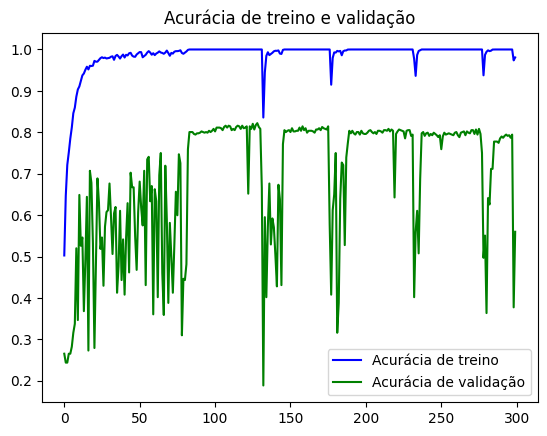

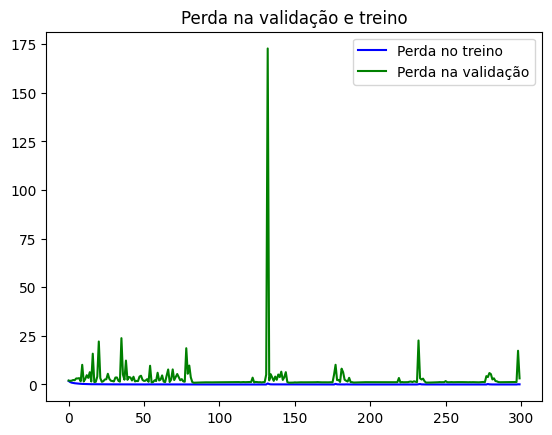

In [34]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda no treino')
plt.plot(epochs, val_loss, 'g', label='Perda na validação')
plt.title('Perda na validação e treino')
plt.legend()
plt.show()

In [35]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_y, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

21/21 [==============================] - 2s 81ms/step - loss: 3.1466 - acc: 0.5115
Test loss: 3.1466224193573
Test accuracy: 0.5115207433700562


In [36]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [38]:
cm = confusion_matrix(test_y, pred_probs)

In [39]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_y, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)

F1 Score: 0.4942971795243558
Sensitivity: [0.19653179 0.5408805  0.63461538 0.6993865 ]
Specificity: [0.9916318  0.80487805 0.67070707 0.88729508]
Precision:   [0.89473684 0.47252747 0.3778626  0.67455621]
Accuracy:    [0.78033794 0.74039939 0.66205837 0.84024578]
